In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import os

In [26]:
path_last_fm = ['/home/leggero_e_tranquillo/Scrivania/articolo/LAST_FM_SONGS']

In [27]:
path3 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA'

In [28]:
path4 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU4RHO5/SCAMBIABILE/'

In [29]:
path5 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU5RHO5'

In [30]:
path6 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU6RHO5'

In [31]:
path7 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU7RHO5'

In [32]:
path_books = ['/home/leggero_e_tranquillo/Scrivania/Gutenberg_Corpus/NOVITA']

In [33]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay

In [34]:
def transform_array(original_array,max_val):
    # Extract the two rows from the original array
    values = original_array[0]
    frequencies = original_array[1]

    # Create a new array with all integer values in the specified range
    new_values = list(range(1, max_val + 1))

    # Initialize the new frequencies array with zeros
    new_frequencies = [0] * len(new_values)

    # Update the frequencies based on the original array
    for i, value in enumerate(values):
        index = new_values.index(value)
        new_frequencies[index] = frequencies[i]

    # Create the final transformed array
    transformed_array = new_frequencies

    return np.array(transformed_array)


In [35]:
paths = [path3,path4,path5,path6,path7]

In [96]:
paths[0]

'/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA'

In [36]:
path01= '/home/leggero_e_tranquillo/Scrivania/articolo/ETA01NU5RHO2/NOVITA'

In [37]:
path02= '/home/leggero_e_tranquillo/Scrivania/articolo/ETA02NU4RHO2/NOVITA'

In [38]:
path03= '/home/leggero_e_tranquillo/Scrivania/articolo/ETA02NU5RHO3/NOVITA'

In [39]:
paths_umst = [path01,path02,path03]

In [40]:
path2 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA'

In [41]:
delays_frequencies_of_each_path = []
for path in paths:
    all_files = glob.glob(os.path.join(path, '*.txt'))
    all_incr_delays = []
    for novelties in all_files[:]:
        novs = np.loadtxt(novelties)
        list_of_delays = delays(novs,False)
        support = np.unique(list_of_delays,return_counts=True)
        increasing_delays = support[0] 
        freqs = support[1]/np.sum(support[1])
        all_incr_delays.append([increasing_delays,freqs])
    
    max_del = 0
    for i in all_incr_delays:
        max_support = np.max(i[0])
        if(max_support>max_del):
            max_del = max_support
    transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]
    avg_freqs = np.zeros(int(max_del))
    for i in transformed_delay:
        avg_freqs +=i
    avg_freqs= avg_freqs/len(transformed_delay)
    delays_frequencies_of_each_path.append([np.arange(1,max_del+1),avg_freqs])

In [42]:
delays_frequencies_of_each_path_umst = []
for path in paths_umst:
    all_files = glob.glob(os.path.join(path, '*.txt'))
    all_incr_delays = []
    for novelties in all_files[:]:
        novs = np.loadtxt(novelties)
        list_of_delays = delays(novs,False)
        support = np.unique(list_of_delays,return_counts=True)
        increasing_delays = support[0] 
        freqs = support[1]/np.sum(support[1])
        all_incr_delays.append([increasing_delays,freqs])
    
    max_del = 0
    for i in all_incr_delays:
        max_support = np.max(i[0])
        if(max_support>max_del):
            max_del = max_support
    transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]
    avg_freqs = np.zeros(int(max_del))
    for i in transformed_delay:
        avg_freqs +=i
    avg_freqs= avg_freqs/len(transformed_delay)
    delays_frequencies_of_each_path_umst.append([np.arange(1,max_del+1),avg_freqs])

In [43]:
delays_frequencies_of_each_path_books = []
for path in path_books:
    all_files = glob.glob(os.path.join(path, '*.txt'))
    all_incr_delays = []
    for novelties in all_files[:]:
        novs = np.loadtxt(novelties)
        list_of_delays = delays(novs,False)
        support = np.unique(list_of_delays,return_counts=True)
        increasing_delays = support[0] 
        freqs = support[1]/np.sum(support[1])
        all_incr_delays.append([increasing_delays,freqs])
    
    max_del = 0
    for i in all_incr_delays:
        max_support = np.max(i[0])
        if(max_support>max_del):
            max_del = max_support
    transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]
    avg_freqs = np.zeros(int(max_del))
    for i in transformed_delay:
        avg_freqs +=i
    avg_freqs= avg_freqs/len(transformed_delay)
    delays_frequencies_of_each_path_books.append([np.arange(1,max_del+1),avg_freqs])

In [44]:
delays_frequencies_of_each_path_last_fm = []
for path in path_last_fm:
    all_files = glob.glob(os.path.join(path, '*.txt'))
    all_incr_delays = []
    for novelties in all_files[:]:
        novs = np.loadtxt(novelties)
        list_of_delays = delays(novs,False)
        support = np.unique(list_of_delays,return_counts=True)
        increasing_delays = support[0]
        if(len(increasing_delays)==0):
            print(novelties)
        freqs = support[1]/np.sum(support[1])
        all_incr_delays.append([increasing_delays,freqs])
    
    max_del = 0
    for i in all_incr_delays:
        max_support = np.max(i[0])
        if(max_support>max_del):
            max_del = max_support
    transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]
    avg_freqs = np.zeros(int(max_del))
    for i in transformed_delay:
        avg_freqs +=i
    avg_freqs= avg_freqs/len(transformed_delay)
    delays_frequencies_of_each_path_last_fm.append([np.arange(1,max_del+1),avg_freqs])

In [21]:
for i in all_incr_delays:
    print(len(i[0]))

183
75
84
114
53
23
231
88
147
116
15
169
34
67
25
61
80
13
50
49
17
8
157
21
24
73
46
23
68
4
27
184
28
58
94
147
41
92
48
49
39
31
39
42
45
75
41
134
166
235
100
186
37
41
56
99
77
152
5
62
1
2
48
88
40
122
99
0
111
67
119
79
99
100
45
109
37
83
123
141
112
54
128
10
83
47
4
13
80
81
177
23
19
37
43
55
61
13
76
6
192
53
169
85
90
28
47
26
24
82
18
66
24
168
29
71
108
93
149
90
74
123
42
106
13
66
61
45
29
50
98
124
89
24
66
30
36
225
24
18
22
43
28
135
2
40
102
34
56
55
33
48
16
149
55
109
81
80
15
2
34
46
32
153
88
1
77
40
33
46
30
162
48
106
66
72
6
34
110
33
121
50
19
44
37
87
20
101
76
28
113
120
29
104
95
51
37
91
80
11
47
118
33
122
27
76
55
49
135
101
54
36
181
15
37
57
135
17
88
21
93
11
60
50
55
44
74
20
13
2
101
192
137
1
65
124
24
40
12
78
201
53
124
32
75
90
89
0
26
85
21
55
59
20
16
70
28
39
88
84
74
17
32
93
1
63
148
144
22
52
74
48
30
120
43
142
27
97
45
59
33
38
107
1
57
83
105
43
4
46
30
25
62
9
19
9
25
93
50
203
151
184
96
28
47
22
149
25
122
47
3
59
135
51
10
9
11


In [24]:
delays_frequencies_of_each_path_last_fm

[[array([1.000e+00, 2.000e+00, 3.000e+00, ..., 7.018e+03, 7.019e+03,
         7.020e+03]),
  array([4.11792794e-01, 1.43759966e-01, 7.75155312e-02, ...,
         0.00000000e+00, 0.00000000e+00, 1.21558674e-06])]]

In [124]:
delays_frequencies_of_each_path_books[0]

[array([1.000e+00, 2.000e+00, 3.000e+00, ..., 3.574e+03, 3.575e+03,
        3.576e+03]),
 array([1.34795246e-01, 1.07003642e-01, 7.62023995e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.17240689e-07])]

In [110]:
delays_frequencies_of_each_path_umst

[[array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 5.7104e+04, 5.7105e+04,
         5.7106e+04]),
  array([2.79065988e-01, 1.44731474e-01, 7.75350709e-02, ...,
         0.00000000e+00, 0.00000000e+00, 9.10000910e-05])],
 [array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.3316e+04, 1.3317e+04,
         1.3318e+04]),
  array([2.54083428e-01, 1.57818997e-01, 9.91780874e-02, ...,
         0.00000000e+00, 0.00000000e+00, 3.47222222e-05])],
 [array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 3.3638e+04, 3.3639e+04,
         3.3640e+04]),
  array([9.79459822e-02, 6.92054838e-02, 5.15783194e-02, ...,
         0.00000000e+00, 0.00000000e+00, 9.61538462e-05])]]

In [100]:
len(delays_frequencies_of_each_path[1][0]),len(delays_frequencies_of_each_path[1][1])

(3207, 3207)

In [10]:
all_files = glob.glob(os.path.join(path2, '*.txt'))

In [12]:
all_files[0]

'/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA/nov_nu3rho5seed1701283569_1N_04_exchange.txt'

In [38]:
all_incr_delays = []
for novelties in all_files[:]:
    novs = np.loadtxt(novelties)
    list_of_delays = delays(novs,False)
    support = np.unique(list_of_delays,return_counts=True)
    increasing_delays = support[0] 
    freqs = support[1]/np.sum(support[1])
    all_incr_delays.append([increasing_delays,freqs])

In [47]:
all_incr_delays[1]

[array([1.000e+00, 2.000e+00, 3.000e+00, ..., 5.679e+03, 5.719e+03,
        5.836e+03]),
 array([3.15789474e-03, 2.60651629e-03, 3.60902256e-03, ...,
        5.01253133e-05, 5.01253133e-05, 5.01253133e-05])]

In [58]:
original_array = [[1, 4, 6, 9], [4, 5, 32, 78]]
transformed_array = transform_array(original_array,50)

In [59]:
transformed_array

array([ 4,  0,  0,  5,  0, 32,  0,  0, 78,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [60]:
max_del = 0
for i in all_incr_delays:
    max_support = np.max(i[0])
    if(max_support>max_del):
        max_del = max_support

In [61]:
max_del

29678.0

In [62]:
transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]

In [70]:
transformed_delay

[array([0.00314656, 0.00278349, 0.00290451, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00315789, 0.00260652, 0.00360902, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00604806, 0.00623622, 0.00607494, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00092826, 0.00106087, 0.00079565, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00697884, 0.00661282, 0.00712525, ..., 0.        , 0.        ,
        0.        ]),
 array([0.01077398, 0.01067206, 0.01040999, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00059233, 0.00133274, 0.00133274, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00825228, 0.00839965, 0.00751547, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00278862, 0.00290017, 0.00262131, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00236714, 0.00349154, 0.00272222, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00360284, 0.00355605, 0.00364964, ..., 0

In [73]:
avg_freqs = np.zeros(int(max_del))
avg_freqs

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
avg_freqs = np.zeros(int(max_del))
for i in transformed_delay:
    avg_freqs +=i
avg_freqs= avg_freqs/len(transformed_delay)

In [77]:
np.sum(avg_freqs)

1.0

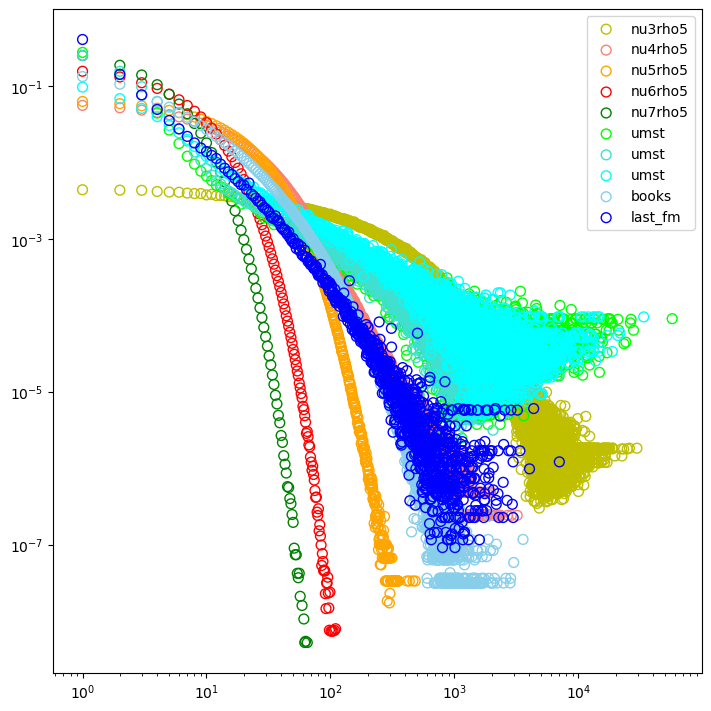

In [50]:
fig, axs = plt.subplots(figsize=(7,7),constrained_layout=True)
axs.scatter(delays_frequencies_of_each_path[0][0],delays_frequencies_of_each_path[0][1],s=50,facecolors='none',edgecolors='y',label='nu3rho5')
axs.scatter(delays_frequencies_of_each_path[1][0],delays_frequencies_of_each_path[1][1],s=50,facecolors='none',edgecolors='salmon',label='nu4rho5')
axs.scatter(delays_frequencies_of_each_path[2][0],delays_frequencies_of_each_path[2][1],s=50,facecolors='none',edgecolors='orange',label='nu5rho5')
axs.scatter(delays_frequencies_of_each_path[3][0],delays_frequencies_of_each_path[3][1],s=50,facecolors='none',edgecolors='r',label='nu6rho5')
axs.scatter(delays_frequencies_of_each_path[4][0],delays_frequencies_of_each_path[4][1],s=50,facecolors='none',edgecolors='green',label='nu7rho5')
axs.scatter(delays_frequencies_of_each_path_umst[0][0],delays_frequencies_of_each_path_umst[0][1],s=50,facecolors='none',edgecolors='lime',label='umst')
axs.scatter(delays_frequencies_of_each_path_umst[1][0],delays_frequencies_of_each_path_umst[1][1],s=50,facecolors='none',edgecolors='turquoise',label='umst')
axs.scatter(delays_frequencies_of_each_path_umst[2][0],delays_frequencies_of_each_path_umst[2][1],s=50,facecolors='none',edgecolors='aqua',label='umst')
axs.scatter(delays_frequencies_of_each_path_books[0][0],delays_frequencies_of_each_path_books[0][1],s=50,facecolors='none',edgecolors='skyblue',label='books')
axs.scatter(delays_frequencies_of_each_path_last_fm[0][0],delays_frequencies_of_each_path_last_fm[0][1],s=50,facecolors='none',edgecolors='blue',label='last_fm')
axs.set_xscale('log')
axs.set_yscale('log')
axs.legend()
plt.show()